In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/UFCG/CDP/final_grades.csv'
df = pd.read_csv(file_path)
df.head()

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test,final_grade
0,18.065560,93,No,8.523188,0,1,7,Basketball,2,52.62
1,34.269198,19,No,9.644920,7,5,29,Swimming,1,59.90
2,37.763791,76,No,4.377829,11,13,13,Basketball,3,81.21
3,13.437846,2,No,4.644968,10,2,47,Baseball,2,30.57
4,22.427779,37,No,4.486873,1,10,45,Basketball,1,68.09


# 1- Realize uma análise exploratória dos dados, identificando e descrevendo:

1.   Correlações entre as variáveis preditoras;
2.   Correlação entre cada variável preditora e a variável-alvo.

In [5]:
df['extracurricular_participation'] = df['extracurricular_participation'].map({'No': 0, 'Yes': 1})

label_encoder = LabelEncoder()
df['sport'] = label_encoder.fit_transform(df['sport'])

correlation_matrix = df.corr()
print(correlation_matrix)

                                study_hours_per_week  books_read_year  \
study_hours_per_week                        1.000000        -0.003084   
books_read_year                            -0.003084         1.000000   
extracurricular_participation               0.018322        -0.001328   
sleep_hours_per_night                       0.022947         0.019694   
junk_food_consumption_per_week             -0.011968        -0.020541   
commute_time_to_school_min                  0.016474         0.011391   
study_hours_with_assistance                 0.044067         0.031801   
sport                                      -0.010666        -0.007594   
anxiety_level_test                         -0.227775        -0.127628   
final_grade                                 0.773320         0.381580   

                                extracurricular_participation  \
study_hours_per_week                                 0.018322   
books_read_year                                     -0.001328   
e

In [6]:
df.head()

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test,final_grade
0,18.065560,93,0,8.523188,0,1,7,2,2,52.62
1,34.269198,19,0,9.644920,7,5,29,7,1,59.90
2,37.763791,76,0,4.377829,11,13,13,2,3,81.21
3,13.437846,2,0,4.644968,10,2,47,1,2,30.57
4,22.427779,37,0,4.486873,1,10,45,2,1,68.09


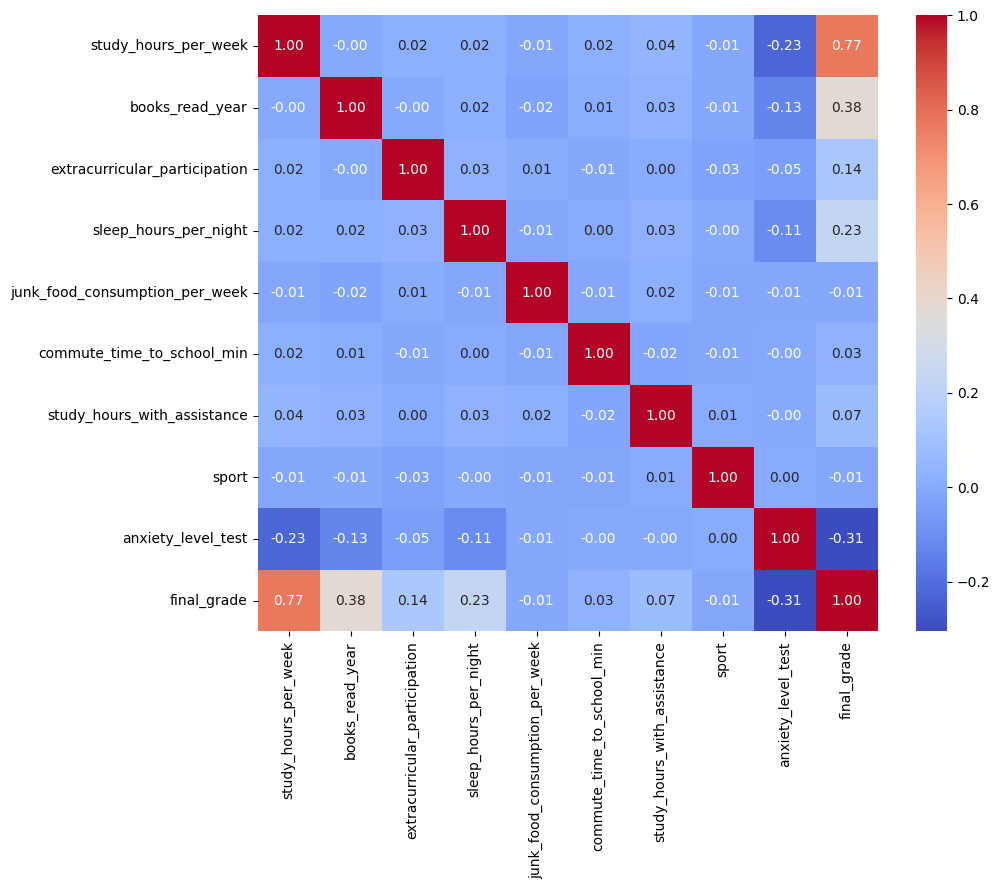

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Análise da Matriz de Correlação

*   study_hours_per_week tem uma correlação positiva forte com final_grade (r=0.77), podemos constatar que quanto mais um estudante estuda por semana maior tende a ser sua nota final.
*   books_read_year também tem uma correlação positiva moderada com final_grade (r=0.38), sugerindo que a quantidade de livros lidos por ano está associada com melhores notas.
*   extracurricular_participation tem uma correlação positiva leve com final_grade (r=0.14), o que pode indicar um impacto positivo da participação em atividades extracurriculares nas notas finais.
*   sleep_hours_per_night mostra uma correlação positiva leve com final_grade (
r=0.23), indicando que mais horas de sono por noite pode estar associado a melhores notas.
*   anxiety_level_test tem uma correlação negativa moderada com final_grade (r=−0.306), sugerindo que níveis mais altos de ansiedade durante os testes estão associados a notas finais mais baixas.
*   List item

As outras variáveis, como junk_food_consumption_per_week, commute_time_to_school_min, study_hours_with_assistance, e sport, têm correlações mais fracas com final_grade, o que indica uma influência menos direta nas notas finais dos estudantes.
A alta correlação de study_hours_per_week com final_grade destaca a importância do tempo de estudo na desempenho acadêmica, enquanto a correlação negativa de anxiety_level_test com final_grade sublinha o impacto negativo da ansiedade nos resultados dos testes.


# 2- Baseando-se na análise feita anteriormente, treine modelos de Regressão Linear utilizando sklearn e avalie usando 5-fold cross validation:
1.   Utilizando a variável melhor correlacionada com a variável-alvo;
2.   Utilizando as três variáveis melhores correlacionadas com a variável-alvo;
3.   Utilizando todas as variáveis.
4.   Compare todos os modelos, em termos de RMSE e R2, entre si e com um modelo que simplesmente prevê a média da variável alvo. Qual o melhor modelo? Discuta os resultados.
5.   Plote os resíduos vs previsões e discuta a viabilidade do modelo de regressão.

In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
X = df.drop(['final_grade'], axis=1)
y = df['final_grade']

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [12]:
y_mean = np.full(len(y), y.mean())
baseline_rmse = rmse(y, y_mean)
baseline_r2 = r2_score(y, y_mean)

In [13]:
model = LinearRegression()

In [17]:
# 1-Utilizando a variável que possui a melhor correlação coma variável-alvo
X_1 = X[['study_hours_per_week']]
scores_1_rmse = cross_val_score(model, X_1, y, cv=kf, scoring='neg_root_mean_squared_error').mean() * -1
scores_1_r2 = cross_val_score(model, X_1, y, cv=kf, scoring='r2').mean()

In [15]:
# 2-Utilizando as três variáveis que possuem melhor correlação com a variável-alvo
X_2 = X[['study_hours_per_week', 'books_read_year', 'sleep_hours_per_night']]
scores_2_rmse = cross_val_score(model, X_2, y, cv=kf, scoring='neg_root_mean_squared_error').mean() * -1
scores_2_r2 = cross_val_score(model, X_2, y, cv=kf, scoring='r2').mean()

In [16]:
# 3-Utilizando todas as variáveis
scores_3_rmse = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error').mean() * -1
scores_3_r2 = cross_val_score(model, X, y, cv=kf, scoring='r2').mean()

In [18]:
# Comparando os modelos
print("Baseline RMSE:", baseline_rmse)
print("Baseline R2:", baseline_r2)
print("1 Variable RMSE:", scores_1_rmse)
print("1 Variable R2:", scores_1_r2)
print("3 Variables RMSE:", scores_2_rmse)
print("3 Variables R2:", scores_2_r2)
print("All Variables RMSE:", scores_3_rmse)
print("All Variables R2:", scores_3_r2)

Baseline RMSE: 21.700011661684517
Baseline R2: 0.0
1 Variable RMSE: 13.761978539262861
1 Variable R2: 0.5961630369312602
3 Variables RMSE: 10.039793531646856
3 Variables R2: 0.7851203771290347
All Variables RMSE: 9.633393063765334
All Variables R2: 0.8021266543124701


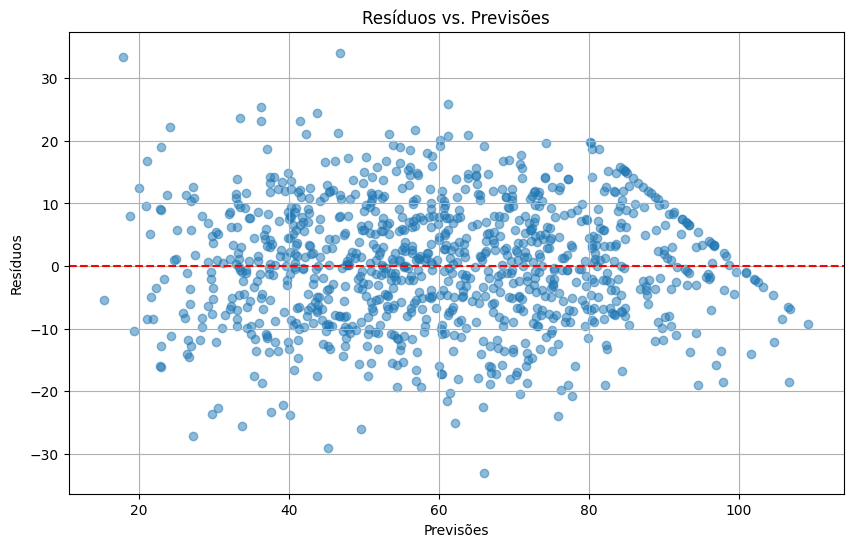

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuos = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.title('Resíduos vs. Previsões')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

# Analisando viabilidade do modelo de regressão
*   Em relação a DISTRIBUIÇÃO DOS RESÍDUOS, eles estão distribuídos aleatoriamente ao redor da linha horizontal y=0, o que é um bom sinal. Não temos um padrão muito claro, podendo ser um indicativo de que o modelo não possue viés consistente em suas previsões.
*   A VARIAÇÃO DOS RESÍDUOS aumentou com o aumento das previsões, podemos supor assim uma potencial heterocedasticidade, pois o modelo aparenta ser menos preciso na previsão de valores mais altos da variável alvo.
*   Existem alguns pontos com resíduos mais altos ou mais baixos, principalmente para valores mais altos de previsões. Podemos considerá-los como outliers ou casos atípicos que o modelo não conseuiu capturar adequadamente.
*   A presença da heterocedasticidade pode ser um indicativo de que o modelo precisa ser melhorado. Algo como transformações nas variáveis, explorar modelos mais robustos a variações na variância dos resíduos ou adicionar variáveis que opossam explicar a variância residual.



# 3- Use a Regressão Lasso para selecionar o melhor (sub)conjunto de atributos. Tune o lambda usando validação cruzada. Discuta esses resultados à luz das duas questões anteriores.

In [23]:
from sklearn.linear_model import Lasso, LassoCV

In [24]:
lasso_cv = LassoCV(cv=5, random_state=42)

lasso_cv.fit(X, y)

best_alpha = lasso_cv.alpha_

lasso_coef = lasso_cv.coef_

lasso_best = Lasso(alpha=best_alpha)
lasso_rmse_scores = cross_val_score(lasso_best, X, y, cv=5, scoring='neg_root_mean_squared_error')
lasso_r2_scores = cross_val_score(lasso_best, X, y, cv=5, scoring='r2')

print('Melhor alpha:', best_alpha)
print('Coeficientes do Lasso:', lasso_coef)
print('RMSE com Lasso:', -lasso_rmse_scores.mean())
print('R2 com Lasso:', lasso_r2_scores.mean())

Melhor alpha: 0.23943178541040003
Coeficientes do Lasso: [ 1.42688475  0.27955581  4.06749964  1.78962667  0.033021    0.04011286
  0.02762181  0.         -0.82421083]
RMSE com Lasso: 9.64243407066031
R2 com Lasso: 0.8019670069356175


# Discussão:
*   O Lasso selecionou a maioria das variáveis, exceto uma (sport, que teve seu coeficiente reduzido a zero). Podemos concluir que, de acordo com o modelo Lasso, a variável 'sport' não contibui significativamente para a previsão da variável alvo 'final_grade'. As variáveis restantes parecem ter algum grau de importância, com 'extracurricular_participation' sendo a mais valorizada, seguida por 'sleep_hours_per_night', 'study_hours_per_week' e 'books_read_year'.
*   A variável 'study_hours_per_week', que foi identificada como a mais correlacionada com a variável alvo na análise de correlação inicial, também é considerada importante no modelo Lasso, embora não seja a variável com o maior coeficiente. A variável 'books_read_year' também é valorizada no modelo Lasso, embora com um peso menor, alinhado com sua correlação mais moderada.
*   Os resultados do RMSE e R2 do modelo Lasso são muito semelhantes aos do modelo que utilizou todas as variáveis preditoras, o que sugere que o modelo Lasso é capaz de alcançar uma eficácia quase igual com um modelo potencialmente mais simples.
*   Em relação a heterocedasticidade no modelo de regressão, o modelo Lasso pode ter mitigado esses problemas pela seleção de atributos e pela penalização de coeficientes que pode ajudar a regularizar o modelo.
*   O valor de alpha encontrado pelo Lasso (aproximadamente 0.239) sugere que há algum nível de penalização, mas não é tão forte a ponto de zerar todos os coeficientes.

# 4- Escolha um modelo diferente da regressão linear (e.g., KNN, SVR, Decision Trees, Random Forests, etc.). Estude o funcionamento do modelo e treine esse modelo usando todas as variáveis. Avalie o modelo como no passo 02 acima e compare com os resultados da regressão linear (também usando todas as variáveis). Discuta os resultados à luz do que estudou sobre o funcionamento desse modelo.;

## Modelo escolhido: Random Forest

Random Forest é um método de ensemble que opera construindo múltiplas árvores de decisão durante o treinamento e produzindo a média das previsões das árvores individuais para obter uma previsão mais precisa e estável.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

X_1 = X[['study_hours_per_week']]
X_3 = X[['study_hours_per_week', 'books_read_year', 'sleep_hours_per_night']]

rf_rmse_1 = -cross_val_score(rf, X_1, y, cv=5, scoring='neg_root_mean_squared_error').mean()
rf_r2_1 = cross_val_score(rf, X_1, y, cv=5, scoring='r2').mean()

rf_rmse_3 = -cross_val_score(rf, X_3, y, cv=5, scoring='neg_root_mean_squared_error').mean()
rf_r2_3 = cross_val_score(rf, X_3, y, cv=5, scoring='r2').mean()

rf_rmse_all = -cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()
rf_r2_all = cross_val_score(rf, X, y, cv=5, scoring='r2').mean()

print('RMSE com 1 variável:', rf_rmse_1)
print('R2 com 1 variável:', rf_r2_1)
print('RMSE com 3 variáveis:', rf_rmse_3)
print('R2 com 3 variáveis:', rf_r2_3)
print('RMSE com todas as variáveis:', rf_rmse_all)
print('R2 com todas as variáveis:', rf_r2_all)

RMSE com 1 variável: 16.615554644600614
R2 com 1 variável: 0.41210501832113555
RMSE com 3 variáveis: 10.800779058254474
R2 com 3 variáveis: 0.7517434816269045
RMSE com todas as variáveis: 10.079552844449102
R2 com todas as variáveis: 0.7837044212396134


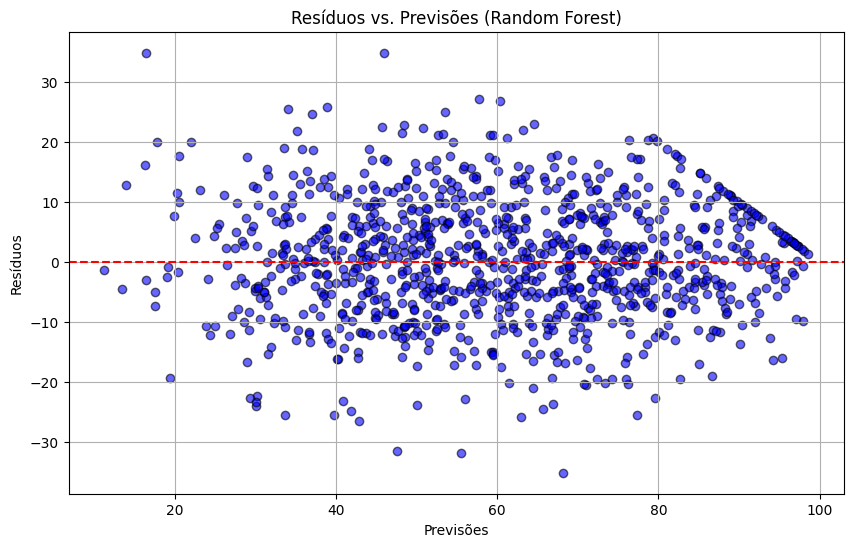

In [27]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

residuos_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuos_rf, color='blue', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Previsões (Random Forest)')
plt.grid(True)
plt.show()

# Analisando os Resultados:
*   No gráfico do Random Forest, os resíduos também parecem estar dispersos aleatoriamente em torno da linha horizontal de resíduo zero. Não há um padrão sistemático óbvio, o que é positivo, pois indica que o modelo não tem viés consistente em suas previsões para diferentes faixas de valores.
*   Comparativamente, o modelo Random Forest parece apresentar uma dispersão de resíduos que não aumenta com o aumento das previsões. Isso pode sugerir que o Random Forest está lidando melhor com a heterocedasticidade do que a regressão linear, potencialmente devido à sua capacidade de modelar interações complexas entre as variáveis.
*   Existem alguns pontos com resíduos altos no gráfico do Random Forest, assim como havia no modelo de regressão linear. Isso pode indicar a presença de outliers ou pontos de dados que são difíceis de prever corretamente para ambos os modelos.
*   Em termos de RMSE e R2, o modelo Random Forest com todas as variáveis (RMSE de 10.08 e R2 de 0.784) teve um desempenho ligeiramente inferior ao modelo de regressão linear com todas as variáveis (RMSE de 9.63 e R2 de 0.802). No entanto, a diferença é relativamente pequena, o que sugere que ambos os modelos estão capturando bem a variabilidade dos dados.
*   Por fim, escolher entra Random Forest e Regressão Linear se resume a quão complexos são os dados e o que estaremos buscando do modelo. O modelo de Regressão Linear é ideal quando precisamos de um modelo mais simples e fácil de explicar, já o Random Forest é ideal quando tivermos dados complexos e precisamos de previsãoes mais precisas, des que tenhamos recursos computacionais para isso.